In [36]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [37]:
riskData = pd.read_csv('clean-train-data.csv')
riskData.head()

Income  Age  Experience Married/Single House_Ownership Car_Ownership  \
0  1303834   23           3         single          rented            no   
1  7574516   40          10         single          rented            no   
2  3991815   66           4        married          rented            no   
3  6256451   41           2         single          rented           yes   
4  5768871   47          11         single          rented            no   

            Profession                 CITY           STATE  CURRENT_JOB_YRS  \
0  Mechanical_engineer                 Rewa  Madhya_Pradesh                3   
1   Software_Developer             Parbhani     Maharashtra                9   
2     Technical_writer            Alappuzha          Kerala                4   
3   Software_Developer          Bhubaneswar          Odisha                2   
4        Civil_servant  Tiruchirappalli[10]      Tamil_Nadu                3   

   CURRENT_HOUSE_YRS  Risk_Flag Risk_Class  
0                 13          0    No Risk  
1                 13          0    No Risk  
2                 10          0    No Risk  
3                 12          1       Risk  
4                 14          1       Risk

# Classification Trees

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix

### Simple Decision Tree

We have chosen to do a simple decision tree for `income` as we know that `income` has the largest range and variance from our EDA.

Train set :  (189000, 1) (189000, 1)
Test set:  (63000, 1) (63000, 1)


[Text(334.8, 543.6, 'Income <= 11272.0\ngini = 0.216\nsamples = 189000\nvalue = [165767, 23233]\nclass = No Risk'),
 Text(167.4, 326.16, 'Income <= 10492.5\ngini = 0.494\nsamples = 81\nvalue = [45, 36]\nclass = No Risk'),
 Text(83.7, 108.72000000000003, 'gini = 0.0\nsamples = 29\nvalue = [29, 0]\nclass = No Risk'),
 Text(251.10000000000002, 108.72000000000003, 'gini = 0.426\nsamples = 52\nvalue = [16, 36]\nclass = Risk'),
 Text(502.20000000000005, 326.16, 'Income <= 1150872.5\ngini = 0.215\nsamples = 188919\nvalue = [165722, 23197]\nclass = No Risk'),
 Text(418.5, 108.72000000000003, 'gini = 0.24\nsamples = 21185\nvalue = [18236, 2949]\nclass = No Risk'),
 Text(585.9, 108.72000000000003, 'gini = 0.212\nsamples = 167734\nvalue = [147486, 20248]\nclass = No Risk')]

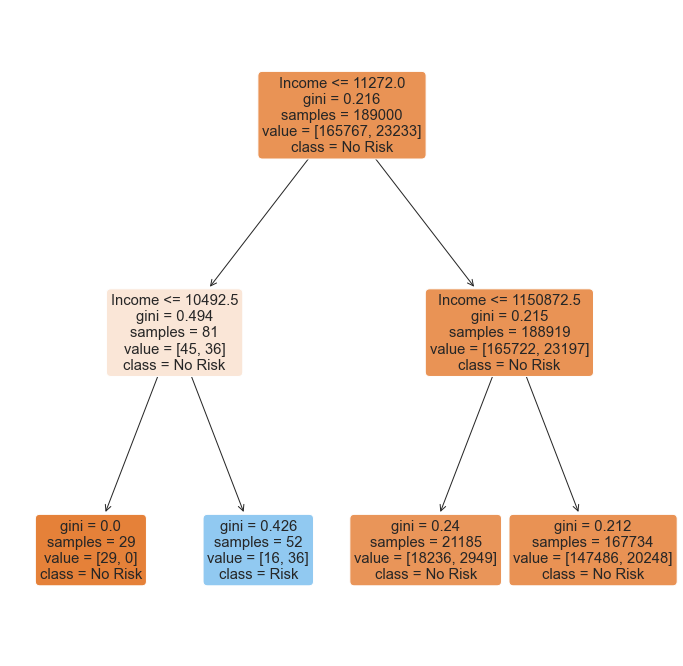

In [39]:
x = pd.DataFrame(riskData['Income'])
y = pd.DataFrame(riskData['Risk_Class'])

X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.25)

print("Train set : ", y_train.shape, X_train.shape)
print("Test set: ",y_test.shape, X_test.shape)


dectree = DecisionTreeClassifier(max_depth = 2)
dectree.fit(X_train, y_train)



f = plt.figure(figsize=(12,12))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["No Risk","Risk"])

### Goodness of Fit of the Model

Train Data
Accuracy  :	 0.8771798941798942

TPR Train :	 0.0015495200791976929
TNR Train :	 0.9999034789795315

FPR Train :	 9.65210204684889e-05
FNR Train :	 0.9984504799208023

Test Data
Accuracy  :	 0.876984126984127

TPR Test :	 0.002189875048306067
TNR Test :	 0.9999275847710773

FPR Test :	 7.241522892264243e-05
FNR Test :	 0.997810124951694



Text(0.5, 1.0, 'Test')

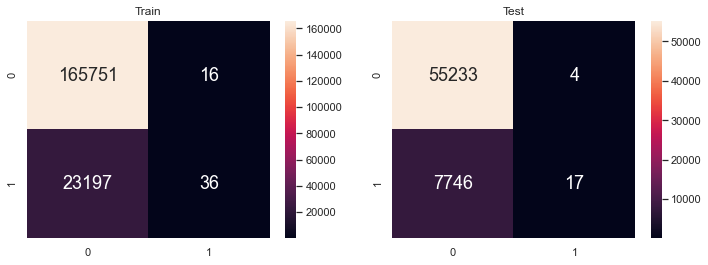

In [40]:
# Predict the Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", dectree.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Risk (1) predicted Risk (1)
fpTrain = cmTrain[0][1] # False Positives : No Risk (0) predicted Risk (1)
tnTrain = cmTrain[0][0] # True Negatives : No Risk (0) predicted No Risk (0)
fnTrain = cmTrain[1][0] # False Negatives : Risk (1) predicted No Risk(0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))
print()

#################################################test#####################################################

# Predict the Response corresponding to Predictors
y_test_pred = dectree.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", dectree.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmtest = confusion_matrix(y_test, y_test_pred)
tptest = cmtest[1][1] # True Positives : Risk (1) predicted Risk (1)
fptest = cmtest[0][1] # False Positives : No Risk (0) predicted Risk (1)
tntest = cmtest[0][0] # True Negatives : No Risk (0) predicted No Risk (0)
fntest = cmtest[1][0] # False Negatives : Risk (1) predicted No Risk(0)

print("TPR Test :\t", (tptest/(tptest + fntest)))
print("TNR Test :\t", (tntest/(tntest + fptest)))
print()

print("FPR Test :\t", (fptest/(fptest + tntest)))
print("FNR Test :\t", (fntest/(fntest + tptest)))
print()

f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
axes[0].set_title('Train')
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
axes[1].set_title('Test')

# Attempt 1 at creating a model
### Multi-Variate Classfication Tree without upsampling

In [41]:
# Import the encoder from sklearn
from sklearn.preprocessing import OneHotEncoder 
ohe = OneHotEncoder()

In [42]:
# OneHotEncoding of categorical predictors (not the response) so that we can plot them into a classification tree
riskData_cat = riskData[['Married/Single','House_Ownership','Car_Ownership']]
ohe.fit(riskData_cat)
riskData_cat_ohe = pd.DataFrame(ohe.transform(riskData_cat).toarray(), 
                                  columns=ohe.get_feature_names(riskData_cat.columns))
                                    #columns=ohe.get_feature_names_out(creditData_cat.columns))
# Check the encoded variables
riskData_cat_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 7 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Married/Single_married        252000 non-null  float64
 1   Married/Single_single         252000 non-null  float64
 2   House_Ownership_norent_noown  252000 non-null  float64
 3   House_Ownership_owned         252000 non-null  float64
 4   House_Ownership_rented        252000 non-null  float64
 5   Car_Ownership_no              252000 non-null  float64
 6   Car_Ownership_yes             252000 non-null  float64
dtypes: float64(7)
memory usage: 13.5 MB


In [43]:
#make a new dataframe that combines numeric and hot encoded categorical data
riskData_num=pd.DataFrame(riskData[["Income","Age","Experience","CURRENT_JOB_YRS","CURRENT_HOUSE_YRS"]])
combined_data = pd.concat([riskData_num, riskData_cat_ohe], 
                           sort = False, axis = 1).reindex(index=riskData_cat_ohe.index)
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 12 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Income                        252000 non-null  int64  
 1   Age                           252000 non-null  int64  
 2   Experience                    252000 non-null  int64  
 3   CURRENT_JOB_YRS               252000 non-null  int64  
 4   CURRENT_HOUSE_YRS             252000 non-null  int64  
 5   Married/Single_married        252000 non-null  float64
 6   Married/Single_single         252000 non-null  float64
 7   House_Ownership_norent_noown  252000 non-null  float64
 8   House_Ownership_owned         252000 non-null  float64
 9   House_Ownership_rented        252000 non-null  float64
 10  Car_Ownership_no              252000 non-null  float64
 11  Car_Ownership_yes             252000 non-null  float64
dtypes: float64(7), int64(5)
memory usage: 23.1 M

[Text(706.8, 1565.568, 'Experience <= 2.5\ngini = 0.216\nsamples = 189000\nvalue = [165749, 23251]\nclass = No Risk'),
 Text(223.2, 1217.664, 'Income <= 11205.0\ngini = 0.265\nsamples = 25234\nvalue = [21275, 3959]\nclass = No Risk'),
 Text(148.79999999999998, 869.76, 'gini = 0.271\nsamples = 31\nvalue = [5, 26]\nclass = Risk'),
 Text(297.59999999999997, 869.76, 'Age <= 27.5\ngini = 0.263\nsamples = 25203\nvalue = [21270, 3933]\nclass = No Risk'),
 Text(148.79999999999998, 521.856, 'CURRENT_HOUSE_YRS <= 12.5\ngini = 0.327\nsamples = 3280\nvalue = [2604, 676]\nclass = No Risk'),
 Text(74.39999999999999, 173.952, 'gini = 0.381\nsamples = 1955\nvalue = [1455, 500]\nclass = No Risk'),
 Text(223.2, 173.952, 'gini = 0.23\nsamples = 1325\nvalue = [1149, 176]\nclass = No Risk'),
 Text(446.4, 521.856, 'House_Ownership_rented <= 0.5\ngini = 0.253\nsamples = 21923\nvalue = [18666, 3257]\nclass = No Risk'),
 Text(371.99999999999994, 173.952, 'gini = 0.159\nsamples = 1598\nvalue = [1459, 139]\nclas

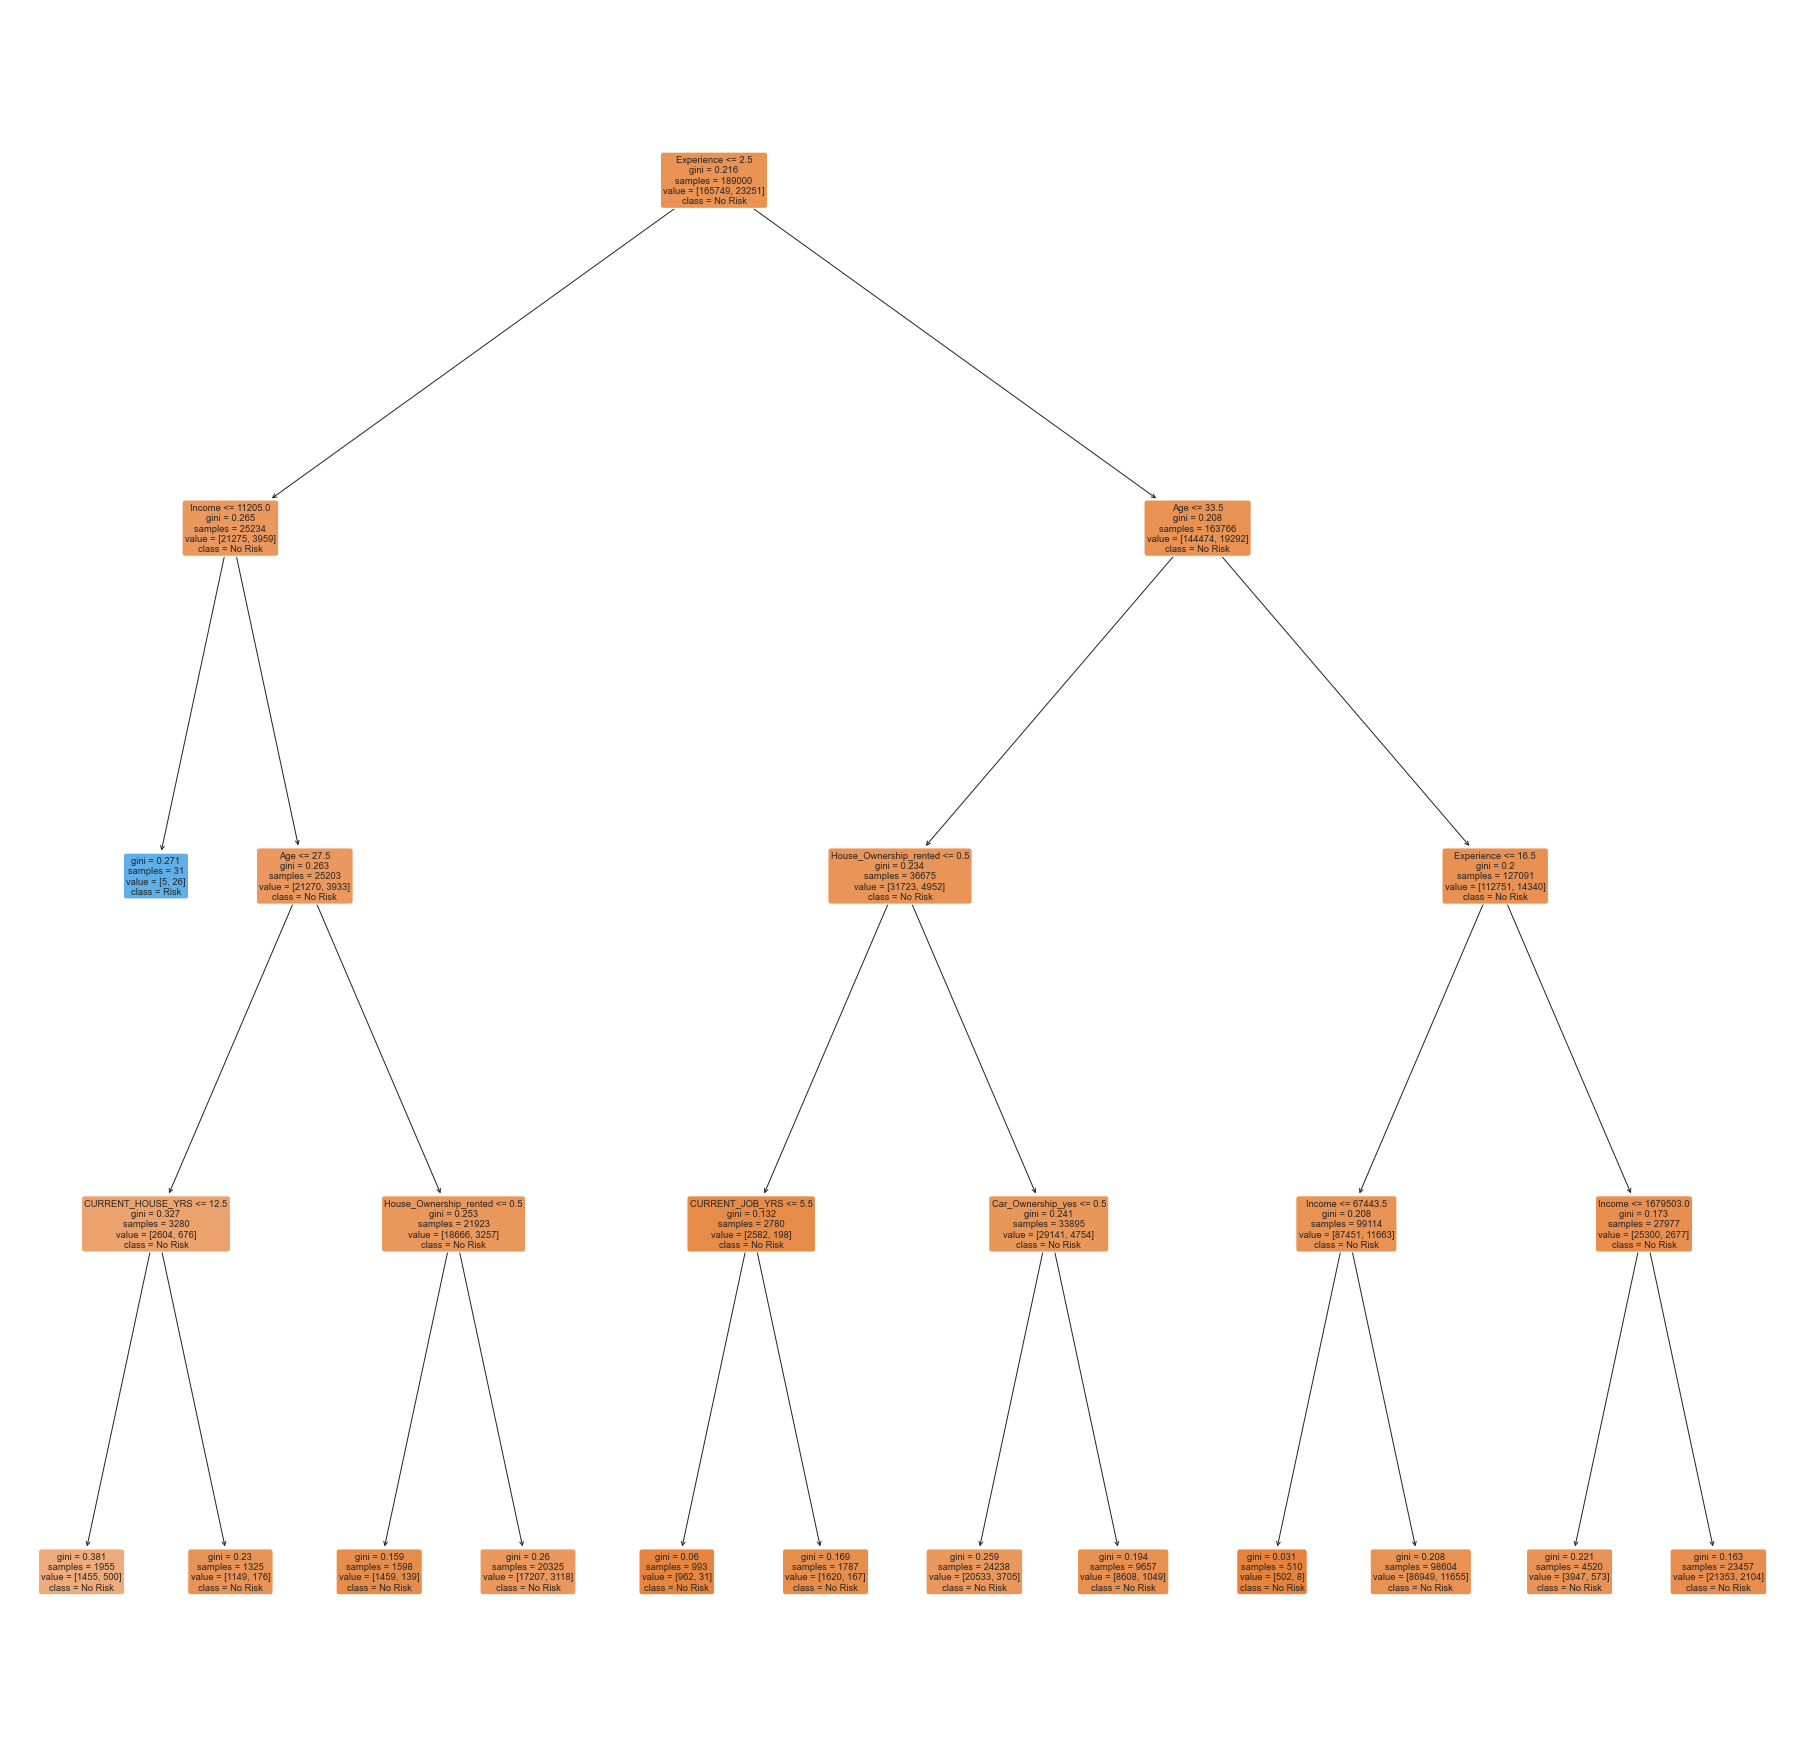

In [44]:
y = pd.DataFrame(riskData["Risk_Class"])
X = combined_data

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 4)  # change max_depth to experiment
dectree.fit(X_train, y_train)                    # train the decision tree model

# Plot the trained Decision Tree
f = plt.figure(figsize=(32,32))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["No Risk","Risk"])

### Checking the Accuracy of the Model

Train Data
Accuracy  :	 0.8770899470899471

TPR Train :	 0.0011182314739151004
TNR Train :	 0.9999698339054836

FPR Train :	 3.0166094516407337e-05
FNR Train :	 0.9988817685260849

Test Data
Accuracy  :	 0.8771269841269841

TPR Test :	 0.0006455777921239509
TNR Test :	 0.9999819020903086

FPR Test :	 1.809790969143064e-05
FNR Test :	 0.9993544222078761



Text(0.5, 1.0, 'Test')

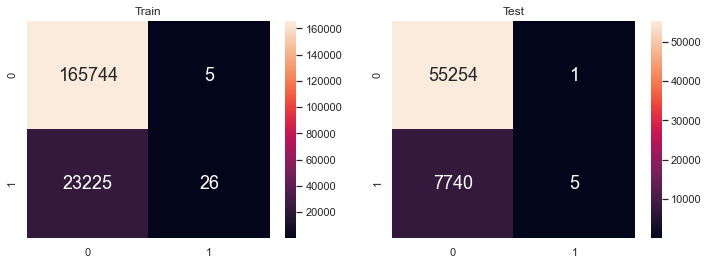

In [45]:
# Predict the Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", dectree.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Risk (1) predicted Risk (1)
fpTrain = cmTrain[0][1] # False Positives : No Risk (0) predicted Risk (1)
tnTrain = cmTrain[0][0] # True Negatives : No Risk (0) predicted No Risk (0)
fnTrain = cmTrain[1][0] # False Negatives : Risk (1) predicted No Risk(0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))
print()

#################################################test#####################################################

# Predict the Response corresponding to Predictors
y_test_pred = dectree.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", dectree.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmtest = confusion_matrix(y_test, y_test_pred)
tptest = cmtest[1][1] # True Positives : Risk (1) predicted Risk (1)
fptest = cmtest[0][1] # False Positives : No Risk (0) predicted Risk (1)
tntest = cmtest[0][0] # True Negatives : No Risk (0) predicted No Risk (0)
fntest = cmtest[1][0] # False Negatives : Risk (1) predicted No Risk(0)

print("TPR Test :\t", (tptest/(tptest + fntest)))
print("TNR Test :\t", (tntest/(tntest + fptest)))
print()

print("FPR Test :\t", (fptest/(fptest + tntest)))
print("FNR Test :\t", (fntest/(fntest + tptest)))
print()

f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
axes[0].set_title('Train')
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
axes[1].set_title('Test')

Looking at the classification tree of the data before upsampling, we can tell from the classification tree of the combined data (numeric and categorical) that `Experience` is the most important determinant of Risk_Flag as it appears at the top of the tree.

However, from our exploratory data analysis, we have found out that there is a large imbalance in the `Risk_Class`. This results in a misleadingly high accuracy. The classification tree is unable to accurately classify `Risk_Class` since we have insufficient data on `Risk` in `Risk_Class`. We will need to upsample the data to give us a better sense of the accuracy. 

# Attempt 2 at creating a model
### Upsampling done to reduce imbalance in risk and no risk

In [46]:
# Upsample Risk to match No Risk
from sklearn.utils import resample

risk = pd.DataFrame(riskData["Risk_Class"])
combined_data = pd.concat([combined_data, risk], 
                           sort = False, axis = 1).reindex(index=combined_data.index)
# combined_data has OHE done, contains both numeric and categorical data
risk = combined_data[combined_data.Risk_Class == 'Risk']
no_risk = combined_data[combined_data.Risk_Class == 'No Risk']
 
# Upsample the Risk
risk_up = resample(risk, 
                        replace=True,                     # sample with replacement
                        n_samples=no_risk.shape[0])    # to match number of No Risk
 
# Combine the two classes back after upsampling
combined_data_up = pd.concat([no_risk,risk_up])
 
# Check the ratio of the classes
combined_data_up['Risk_Class'].value_counts()

Risk       221004
No Risk    221004
Name: Risk_Class, dtype: int64

Risk is matched to no risk i.e. the total number of data is now larger.

In [47]:
combined_data_up.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 442008 entries, 0 to 53062
Data columns (total 13 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Income                        442008 non-null  int64  
 1   Age                           442008 non-null  int64  
 2   Experience                    442008 non-null  int64  
 3   CURRENT_JOB_YRS               442008 non-null  int64  
 4   CURRENT_HOUSE_YRS             442008 non-null  int64  
 5   Married/Single_married        442008 non-null  float64
 6   Married/Single_single         442008 non-null  float64
 7   House_Ownership_norent_noown  442008 non-null  float64
 8   House_Ownership_owned         442008 non-null  float64
 9   House_Ownership_rented        442008 non-null  float64
 10  Car_Ownership_no              442008 non-null  float64
 11  Car_Ownership_yes             442008 non-null  float64
 12  Risk_Class                    442008 non-null

In [48]:
# Extract Response and Predictors
y = pd.DataFrame(combined_data_up['Risk_Class'])
X = pd.DataFrame(combined_data_up[['Income','Age','Experience','CURRENT_JOB_YRS','CURRENT_HOUSE_YRS','Married/Single_married','Married/Single_single','House_Ownership_norent_noown','House_Ownership_owned','House_Ownership_rented','Car_Ownership_no','Car_Ownership_yes']])

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 7)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

f = plt.figure(figsize=(450,40))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["No Risk","Risk"],
         fontsize=15)

[Text(12295.772879464286, 2038.5, 'CURRENT_JOB_YRS <= 2.5\ngini = 0.5\nsamples = 331506\nvalue = [165898, 165608]\nclass = No Risk'),
 Text(5990.248325892858, 1766.7, 'Age <= 31.5\ngini = 0.49\nsamples = 49486\nvalue = [21273, 28213]\nclass = Risk'),
 Text(3054.6763392857147, 1494.9, 'CURRENT_JOB_YRS <= 0.5\ngini = 0.455\nsamples = 11133\nvalue = [3904, 7229]\nclass = Risk'),
 Text(1625.4241071428573, 1223.1, 'Income <= 8722290.0\ngini = 0.408\nsamples = 3973\nvalue = [1136, 2837]\nclass = Risk'),
 Text(896.7857142857143, 951.3, 'Age <= 22.5\ngini = 0.38\nsamples = 3772\nvalue = [962, 2810]\nclass = Risk'),
 Text(448.39285714285717, 679.5, 'CURRENT_HOUSE_YRS <= 12.5\ngini = 0.211\nsamples = 1111\nvalue = [133, 978]\nclass = Risk'),
 Text(224.19642857142858, 407.70000000000005, 'Age <= 21.5\ngini = 0.136\nsamples = 870\nvalue = [64, 806]\nclass = Risk'),
 Text(112.09821428571429, 135.9000000000001, 'gini = 0.07\nsamples = 656\nvalue = [24, 632]\nclass = Risk'),
 Text(336.2946428571429, 

We have included a high-definition image of the tree for your reference under the 'notebooks' folder in Github.

### Checking the Accuracy of Model

Train Data
Accuracy  :	 0.5731962619077784

TPR Train :	 0.35364233611902807
TNR Train :	 0.7923663938082436

FPR Train :	 0.2076336061917564
FNR Train :	 0.6463576638809719

Test Data
Accuracy  :	 0.5711661327396789

TPR Test :	 0.35264279009314753
TNR Test :	 0.7908394730156426

FPR Test :	 0.20916052698435741
FNR Test :	 0.6473572099068525



Text(0.5, 1.0, 'Test')

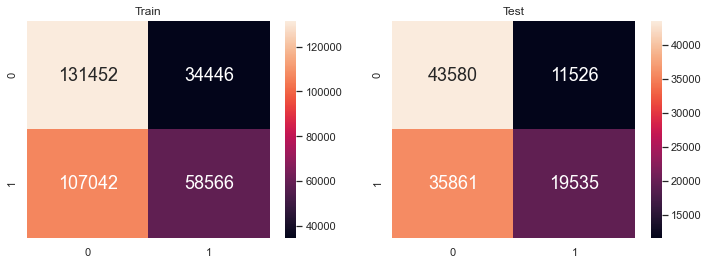

In [49]:
# Predict the Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", dectree.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Risk (1) predicted Risk (1)
fpTrain = cmTrain[0][1] # False Positives : No Risk (0) predicted Risk (1)
tnTrain = cmTrain[0][0] # True Negatives : No Risk (0) predicted No Risk (0)
fnTrain = cmTrain[1][0] # False Negatives : Risk (1) predicted No Risk(0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))
print()

#################################################test#####################################################

# Predict the Response corresponding to Predictors
y_test_pred = dectree.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", dectree.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmtest = confusion_matrix(y_test, y_test_pred)
tptest = cmtest[1][1] # True Positives : Risk (1) predicted Risk (1)
fptest = cmtest[0][1] # False Positives : No Risk (0) predicted Risk (1)
tntest = cmtest[0][0] # True Negatives : No Risk (0) predicted No Risk (0)
fntest = cmtest[1][0] # False Negatives : Risk (1) predicted No Risk(0)

print("TPR Test :\t", (tptest/(tptest + fntest)))
print("TNR Test :\t", (tntest/(tntest + fptest)))
print()

print("FPR Test :\t", (fptest/(fptest + tntest)))
print("FNR Test :\t", (fntest/(fntest + tptest)))
print()

f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
axes[0].set_title('Train')
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
axes[1].set_title('Test')

After upsampling is done, the accuracy of the decision tree has expectedly decreased. Nonetheless, we can see that for the combined classification tree, `age` is the best determinant in determining if an individual will default a loan as it appears the most number of times in the decision tree. However, we need to take into consideration the low prediction accuracy, and more importantly, the high false negative rates (FNR) of the combined model. We need to be especially cautious of the high FNR as these are the individuals which are falsely identified as `No Risk` instead of `Risk`.

# Attempt 3 at creating a model
### Random Forest done on top of upsampling

#### Attempt 3.1
Number of trees: 1000 | Maximum depth of each tree: 10

In [50]:
# Import RandomForestClassifier model from Scikit-Learn
from sklearn.ensemble import RandomForestClassifier

In [51]:
y = pd.DataFrame(combined_data_up['Risk_Class'])
X = pd.DataFrame(combined_data_up.drop('Risk_Class',axis = 1))

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)


# Create the Random Forest object
rforest = RandomForestClassifier(n_estimators = 1000,  # n_estimators denote number of trees
                                 max_depth = 10)       # set the maximum depth of each tree

# Fit Random Forest on Train Data
rforest.fit(X_train, y_train.Risk_Class.ravel())

RandomForestClassifier(max_depth=10, n_estimators=1000)

Train Data
Accuracy  :	 0.7309219139321762

TPR Train :	 0.6754424084401632
TNR Train :	 0.7863552483988856

FPR Train :	 0.21364475160111446
FNR Train :	 0.3245575915598368

Test Data
Accuracy  :	 0.7253352880490851

TPR Test :	 0.6703181489515546
TNR Test :	 0.7804900148599181

FPR Test :	 0.2195099851400819
FNR Test :	 0.3296818510484454


Text(0.5, 1.0, 'Test')

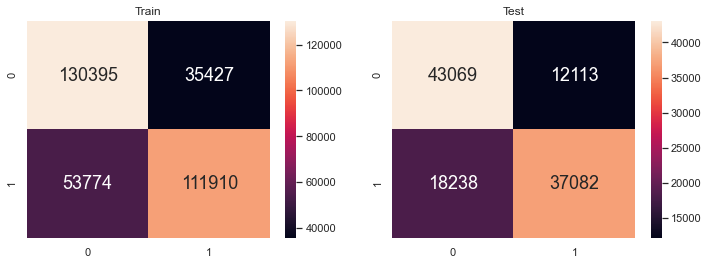

In [52]:
# Predict the Response corresponding to Predictors
y_train_pred = rforest.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", rforest.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Risk (1) predicted Risk (1)
fpTrain = cmTrain[0][1] # False Positives : No Risk (0) predicted Risk (1)
tnTrain = cmTrain[0][0] # True Negatives : No Risk (0) predicted No Risk (0)
fnTrain = cmTrain[1][0] # False Negatives : Risk (1) predicted No Risk(0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))
print()

# Predict the Response corresponding to Predictors
y_test_pred = rforest.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", rforest.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmtest = confusion_matrix(y_test, y_test_pred)
tptest = cmtest[1][1] # True Positives : Risk (1) predicted Risk (1)
fptest = cmtest[0][1] # False Positives : No Risk (0) predicted Risk (1)
tntest = cmtest[0][0] # True Negatives : No Risk (0) predicted No Risk (0)
fntest = cmtest[1][0] # False Negatives : Risk (1) predicted No Risk(0)

print("TPR Test :\t", (tptest/(tptest + fntest)))
print("TNR Test :\t", (tntest/(tntest + fptest)))
print()

print("FPR Test :\t", (fptest/(fptest + tntest)))
print("FNR Test :\t", (fntest/(fntest + tptest)))


f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
axes[0].set_title('Train')
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
axes[1].set_title('Test')

#### Attempt 3.2
Number of trees: 500 | Maximum depth of each tree: 20

In [53]:
y = pd.DataFrame(combined_data_up['Risk_Class'])
X = pd.DataFrame(combined_data_up.drop('Risk_Class',axis = 1))

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)


# Create the Random Forest object
rforest = RandomForestClassifier(n_estimators = 500,  # n_estimators denote number of trees
                                 max_depth = 20)       # set the maximum depth of each tree

# Fit Random Forest on Train Data
rforest.fit(X_train, y_train.Risk_Class.ravel())

RandomForestClassifier(max_depth=20, n_estimators=500)

Train Data
Accuracy  :	 0.9491200762580466

TPR Train :	 0.9856853306308588
TNR Train :	 0.9125455554751044

FPR Train :	 0.08745444452489562
FNR Train :	 0.014314669369141119

Test Data
Accuracy  :	 0.9411956344681545

TPR Test :	 0.9823103385841029
TNR Test :	 0.9001121725285859

FPR Test :	 0.0998878274714141
FNR Test :	 0.017689661415897156


Text(0.5, 1.0, 'Test')

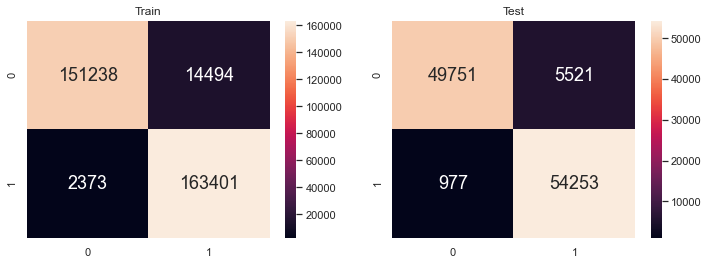

In [54]:
# Predict the Response corresponding to Predictors
y_train_pred = rforest.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", rforest.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Risk (1) predicted Risk (1)
fpTrain = cmTrain[0][1] # False Positives : No Risk (0) predicted Risk (1)
tnTrain = cmTrain[0][0] # True Negatives : No Risk (0) predicted No Risk (0)
fnTrain = cmTrain[1][0] # False Negatives : Risk (1) predicted No Risk(0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))
print()

# Predict the Response corresponding to Predictors
y_test_pred = rforest.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", rforest.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmtest = confusion_matrix(y_test, y_test_pred)
tptest = cmtest[1][1] # True Positives : Risk (1) predicted Risk (1)
fptest = cmtest[0][1] # False Positives : No Risk (0) predicted Risk (1)
tntest = cmtest[0][0] # True Negatives : No Risk (0) predicted No Risk (0)
fntest = cmtest[1][0] # False Negatives : Risk (1) predicted No Risk(0)

print("TPR Test :\t", (tptest/(tptest + fntest)))
print("TNR Test :\t", (tntest/(tntest + fptest)))
print()

print("FPR Test :\t", (fptest/(fptest + tntest)))
print("FNR Test :\t", (fntest/(fntest + tptest)))


f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
axes[0].set_title('Train')
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
axes[1].set_title('Test')

#### Attempt 3.3
Number of trees: 1000 | Maximum depth of each tree: 20

In [55]:
y = pd.DataFrame(combined_data_up['Risk_Class'])
X = pd.DataFrame(combined_data_up.drop('Risk_Class',axis = 1))

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)


# Create the Random Forest object
rforest = RandomForestClassifier(n_estimators = 1000,  # n_estimators denote number of trees
                                 max_depth = 20)       # set the maximum depth of each tree

# Fit Random Forest on Train Data
rforest.fit(X_train, y_train.Risk_Class.ravel())

RandomForestClassifier(max_depth=20, n_estimators=1000)

Train Data
Accuracy  :	 0.9488214391293068

TPR Train :	 0.9852409220196506
TNR Train :	 0.9124721992851675

FPR Train :	 0.08752780071483247
FNR Train :	 0.014759077980349412

Test Data
Accuracy  :	 0.9408155508497584

TPR Test :	 0.9818989009402466
TNR Test :	 0.8994935651921366

FPR Test :	 0.10050643480786335
FNR Test :	 0.01810109905975348


Text(0.5, 1.0, 'Test')

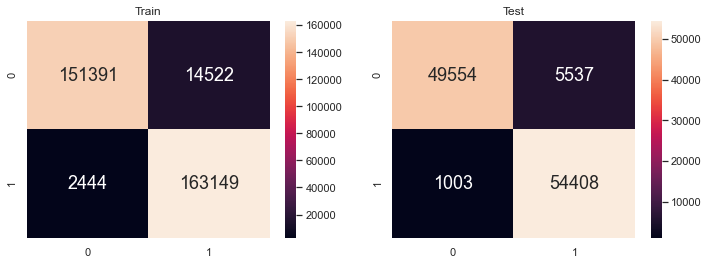

In [56]:
# Predict the Response corresponding to Predictors
y_train_pred = rforest.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", rforest.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Risk (1) predicted Risk (1)
fpTrain = cmTrain[0][1] # False Positives : No Risk (0) predicted Risk (1)
tnTrain = cmTrain[0][0] # True Negatives : No Risk (0) predicted No Risk (0)
fnTrain = cmTrain[1][0] # False Negatives : Risk (1) predicted No Risk(0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))
print()

# Predict the Response corresponding to Predictors
y_test_pred = rforest.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", rforest.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmtest = confusion_matrix(y_test, y_test_pred)
tptest = cmtest[1][1] # True Positives : Risk (1) predicted Risk (1)
fptest = cmtest[0][1] # False Positives : No Risk (0) predicted Risk (1)
tntest = cmtest[0][0] # True Negatives : No Risk (0) predicted No Risk (0)
fntest = cmtest[1][0] # False Negatives : Risk (1) predicted No Risk(0)

print("TPR Test :\t", (tptest/(tptest + fntest)))
print("TNR Test :\t", (tntest/(tntest + fptest)))
print()

print("FPR Test :\t", (fptest/(fptest + tntest)))
print("FNR Test :\t", (fntest/(fntest + tptest)))


f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
axes[0].set_title('Train')
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
axes[1].set_title('Test')

Due to the size of our dataset, we were unable to run GridSearchCV to find the best depth and number of trees.

Through trial and error, we have realised that increasing the number of decision trees has little impact on the accuracy. However, increasing the depth increases the accuracy remarkably.

The large increase in accuracy from attempt 3.1 to 3.3 is due to the increase in depth and not the number of trees. Comparing attempts 3.2 and 3.3, we can see that an increase in the number of trees from 500 to 1000 did not lead to any significant improvement in our model accuracy. On the other hand, comparing attempts 3.1 and 3.2, even though we decreased the number of trees from 1000 to 500 and increased the depth from 10 to 20, there is a significant improvement in the classification accuracy from 0.73 to 0.94.

Having a max depth of 20 (with n_estimators set at 1000) has given us a very good accuracy and low FNR for both train and test datasets. 

#### Feature Importances on the best model (upsampled)

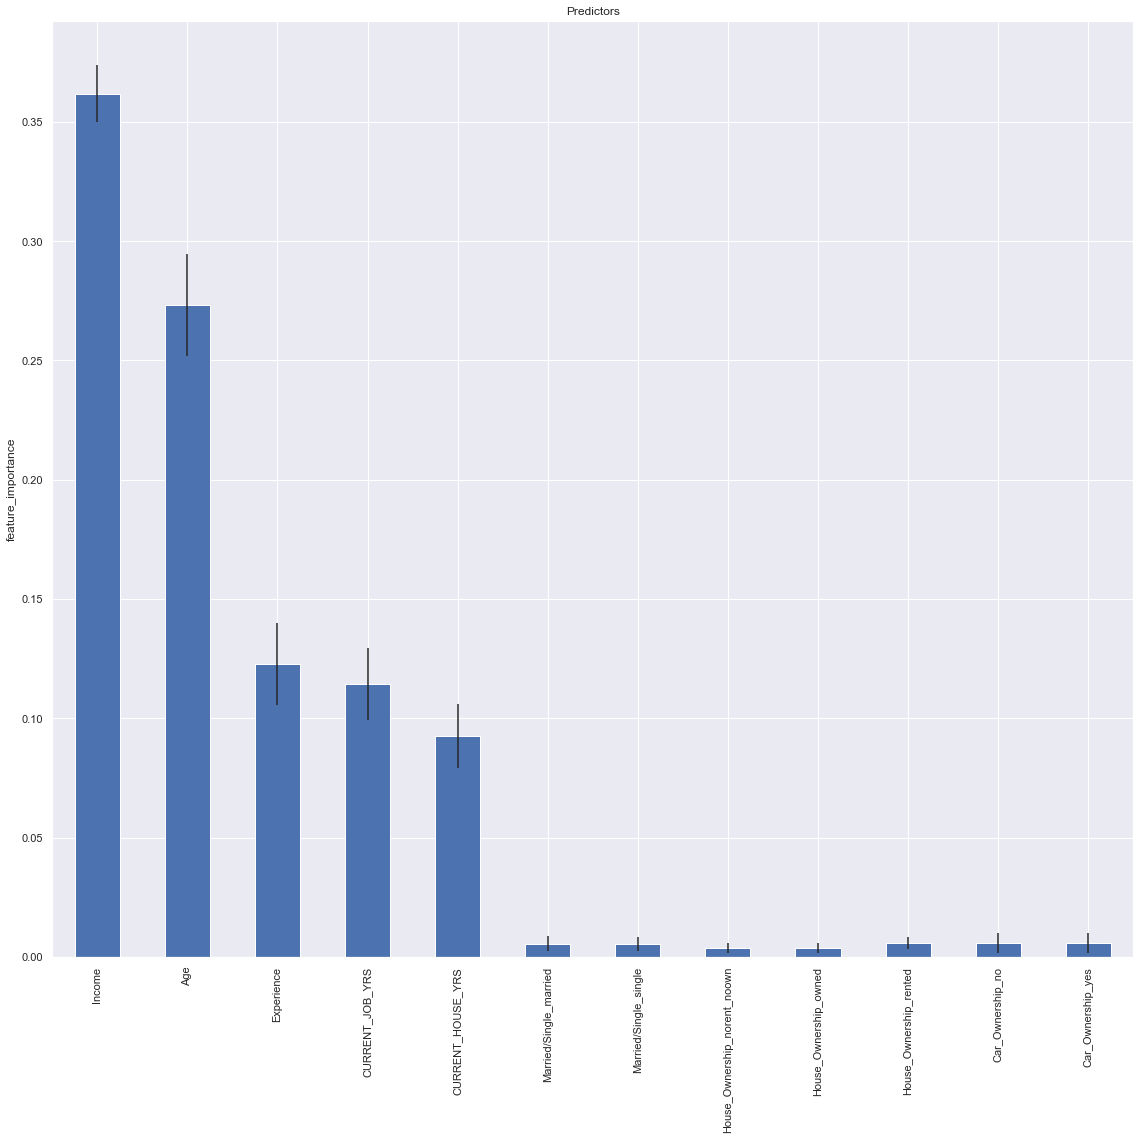

In [57]:
importances = rforest.feature_importances_
std = np.std([tree.feature_importances_ for tree in rforest.estimators_], axis=0)

feature_names = [f"{column_name}" for column_name, column in X.transpose().iterrows()]
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots(figsize = (16,16))
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Predictors")
ax.set_ylabel("feature_importance")
fig.tight_layout()

In order to find the most important feature in the dataset when predicting `Risk_Class`, we printed out a graph to show the order of importance of the variables. From the graph, it is clear that `Income` and `Age` are the most important variables while `Car_Ownership` and `House_Ownership` are of least importance. For categorical data, `CURRENT_JOB_YRS` and `CURRENT_HOUSE_YRS` are the most important.

# Attempt 4 at creating a model
### Downsampling instead of upsampling

After some thought and research, we realised that upsampling our data may cause data leakage. Thus, we have decided to downsample our data to prevent this. Since we still have a significant amount of data points after downsampling, it is safe to do so.

In [58]:
combined_data.head()

Income  Age  Experience  CURRENT_JOB_YRS  CURRENT_HOUSE_YRS  \
0  1303834   23           3                3                 13   
1  7574516   40          10                9                 13   
2  3991815   66           4                4                 10   
3  6256451   41           2                2                 12   
4  5768871   47          11                3                 14   

   Married/Single_married  Married/Single_single  \
0                     0.0                    1.0   
1                     0.0                    1.0   
2                     1.0                    0.0   
3                     0.0                    1.0   
4                     0.0                    1.0   

   House_Ownership_norent_noown  House_Ownership_owned  \
0                           0.0                    0.0   
1                           0.0                    0.0   
2                           0.0                    0.0   
3                           0.0                    0.0   
4                           0.0                    0.0   

   House_Ownership_rented  Car_Ownership_no  Car_Ownership_yes Risk_Class  
0                     1.0               1.0                0.0    No Risk  
1                     1.0               1.0                0.0    No Risk  
2                     1.0               1.0                0.0    No Risk  
3                     1.0               0.0                1.0       Risk  
4                     1.0               1.0                0.0       Risk

In [59]:
#in the upsampling cell, we have created variables 'risk' and 'no_risk' for the combined dataframe

# Downsample the No Risk samples
no_risk_down = resample(no_risk, 
                        replace=False,                     # sample with replacement
                        n_samples=risk.shape[0])    # to match number of Risk
 
# Combine the two classes back after upsampling
combined_data_down = pd.concat([risk,no_risk_down])
 
# Check the ratio of the classes
combined_data_down['Risk_Class'].value_counts()

Risk       30996
No Risk    30996
Name: Risk_Class, dtype: int64

`No Risk` is matched with `Risk` i.e. the total number (30996) of data is now smaller.

In [60]:
combined_data_down.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61992 entries, 3 to 35794
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Income                        61992 non-null  int64  
 1   Age                           61992 non-null  int64  
 2   Experience                    61992 non-null  int64  
 3   CURRENT_JOB_YRS               61992 non-null  int64  
 4   CURRENT_HOUSE_YRS             61992 non-null  int64  
 5   Married/Single_married        61992 non-null  float64
 6   Married/Single_single         61992 non-null  float64
 7   House_Ownership_norent_noown  61992 non-null  float64
 8   House_Ownership_owned         61992 non-null  float64
 9   House_Ownership_rented        61992 non-null  float64
 10  Car_Ownership_no              61992 non-null  float64
 11  Car_Ownership_yes             61992 non-null  float64
 12  Risk_Class                    61992 non-null  object 
dtypes

### Random Forest done on top of downsampling
#### Attempt 4.1
Number of trees: 1000 | Maximum depth of each tree: 20

In [61]:
y = pd.DataFrame(combined_data_down['Risk_Class'])
X = pd.DataFrame(combined_data_down.drop('Risk_Class', axis = 1))

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)


# Create the Random Forest object
rforest = RandomForestClassifier(n_estimators = 1000,  # n_estimators denote number of trees
                                 max_depth = 20)       # set the maximum depth of each tree

# Fit Random Forest on Train Data
rforest.fit(X_train, y_train.Risk_Class.ravel())

RandomForestClassifier(max_depth=20, n_estimators=1000)

Train Data
Accuracy  :	 0.9499505312513442

TPR Train :	 0.984817943989364
TNR Train :	 0.91487250291237

FPR Train :	 0.08512749708762998
FNR Train :	 0.015182056010636017

Test Data
Accuracy  :	 0.8532068654019873

TPR Test :	 0.8320093762208621
TNR Test :	 0.874024811356951

FPR Test :	 0.125975188643049
FNR Test :	 0.1679906237791379


Text(0.5, 1.0, 'Test')

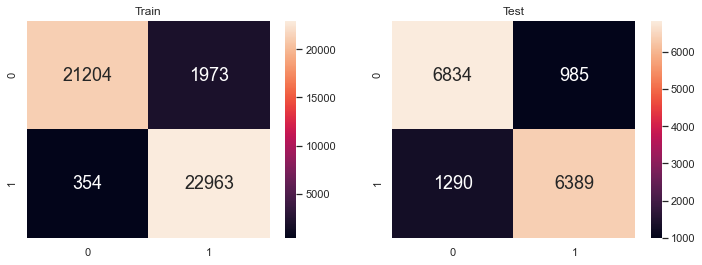

In [62]:
# Predict the Response corresponding to Predictors
y_train_pred = rforest.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", rforest.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Risk (1) predicted Risk (1)
fpTrain = cmTrain[0][1] # False Positives : No Risk (0) predicted Risk (1)
tnTrain = cmTrain[0][0] # True Negatives : No Risk (0) predicted No Risk (0)
fnTrain = cmTrain[1][0] # False Negatives : Risk (1) predicted No Risk(0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))
print()

# Predict the Response corresponding to Predictors
y_test_pred = rforest.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", rforest.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmtest = confusion_matrix(y_test, y_test_pred)
tptest = cmtest[1][1] # True Positives : Risk (1) predicted Risk (1)
fptest = cmtest[0][1] # False Positives : No Risk (0) predicted Risk (1)
tntest = cmtest[0][0] # True Negatives : No Risk (0) predicted No Risk (0)
fntest = cmtest[1][0] # False Negatives : Risk (1) predicted No Risk(0)

print("TPR Test :\t", (tptest/(tptest + fntest)))
print("TNR Test :\t", (tntest/(tntest + fptest)))
print()

print("FPR Test :\t", (fptest/(fptest + tntest)))
print("FNR Test :\t", (fntest/(fntest + tptest)))


f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
axes[0].set_title('Train')
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
axes[1].set_title('Test')

Since the dataset is now smaller, we can perform GridSearchCV to find the best combination of trees and depth.
Searching for best max_depth for rForest between 18 to 23, with n_estimators from 100 to 1000 with jumps of 300.

In [63]:
from sklearn.model_selection import GridSearchCV
# Define the Hyper-parameter Grid to search on
param_grid = {'n_estimators': np.arange(100,1001,300),   # number of trees at 100 , 400, 700, 1000
              'max_depth': np.arange(18, 24)}             # depth of trees 18 to 23

# Create the Hyper-parameter Grid
hpGrid = GridSearchCV(RandomForestClassifier(),  
                      param_grid,                
                      cv = 3,                     # 3-fold cross-validation
                      scoring = 'accuracy',
                      n_jobs = -1)      

# Train the models using Cross-validation
hpGrid.fit(X_train, y_train.Risk_Class.ravel())

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': array([18, 19, 20, 21, 22, 23]),
                         'n_estimators': array([ 100,  400,  700, 1000])},
             scoring='accuracy')

In [64]:
# Fetch the best Model or the best set of Hyper-parameters
print(hpGrid.best_estimator_)

# Print the score (accuracy) of the best Model after CV
print(np.abs(hpGrid.best_score_))

RandomForestClassifier(max_depth=23, n_estimators=700)
0.8440013765217017


#### Attempt 4.2 (Using the parameters from GridSearchCV)
Number of trees: 700 | Maximum depth of each tree: 23

In [65]:
y = pd.DataFrame(combined_data_down['Risk_Class'])
X = pd.DataFrame(combined_data_down.drop('Risk_Class', axis = 1))

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)


# Create the Random Forest object
rforest = RandomForestClassifier(n_estimators = 700,  # n_estimators denote number of trees
                                 max_depth = 23)       # set the maximum depth of each tree

# Fit Random Forest on Train Data
rforest.fit(X_train, y_train.Risk_Class.ravel())

RandomForestClassifier(max_depth=23, n_estimators=700)

Train Data
Accuracy  :	 0.9550909794812233

TPR Train :	 0.9951732459920704
TNR Train :	 0.9151567196221554

FPR Train :	 0.08484328037784457
FNR Train :	 0.004826754007929667

Test Data
Accuracy  :	 0.8524970963995354

TPR Test :	 0.8318788501026694
TNR Test :	 0.8733454451077083

FPR Test :	 0.12665455489229172
FNR Test :	 0.1681211498973306


Text(0.5, 1.0, 'Test')

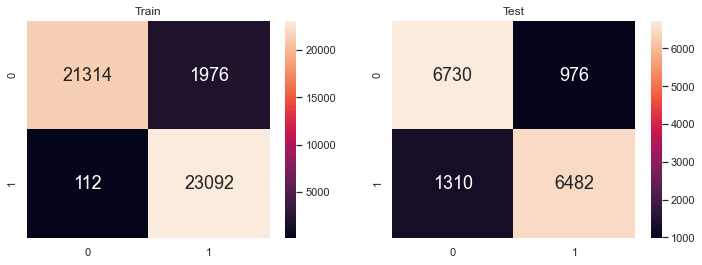

In [66]:
# Predict the Response corresponding to Predictors
y_train_pred = rforest.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", rforest.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))
print()

# Predict the Response corresponding to Predictors
y_test_pred = rforest.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", rforest.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))


f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
axes[0].set_title('Train')
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
axes[1].set_title('Test')

Comparing the final upsampled model and the final downsampled model, the upsampled model might seem superior in terms of accuracy in predicting the test portion of the dataset and its FNR. This is because the accuracy values gives us a wrong sense of how our machine learning model is really performing. However, the downsampled model has the advantage of testing on data that has not been manufactured (and only data that has been provided) (less data leakage).

A possible reason that the upsampled model performed better in terms of accuracy and FNR might be due to the larger size of data that it had the opportunity to train on.

#### Feature Importances on the best model (downsampled)

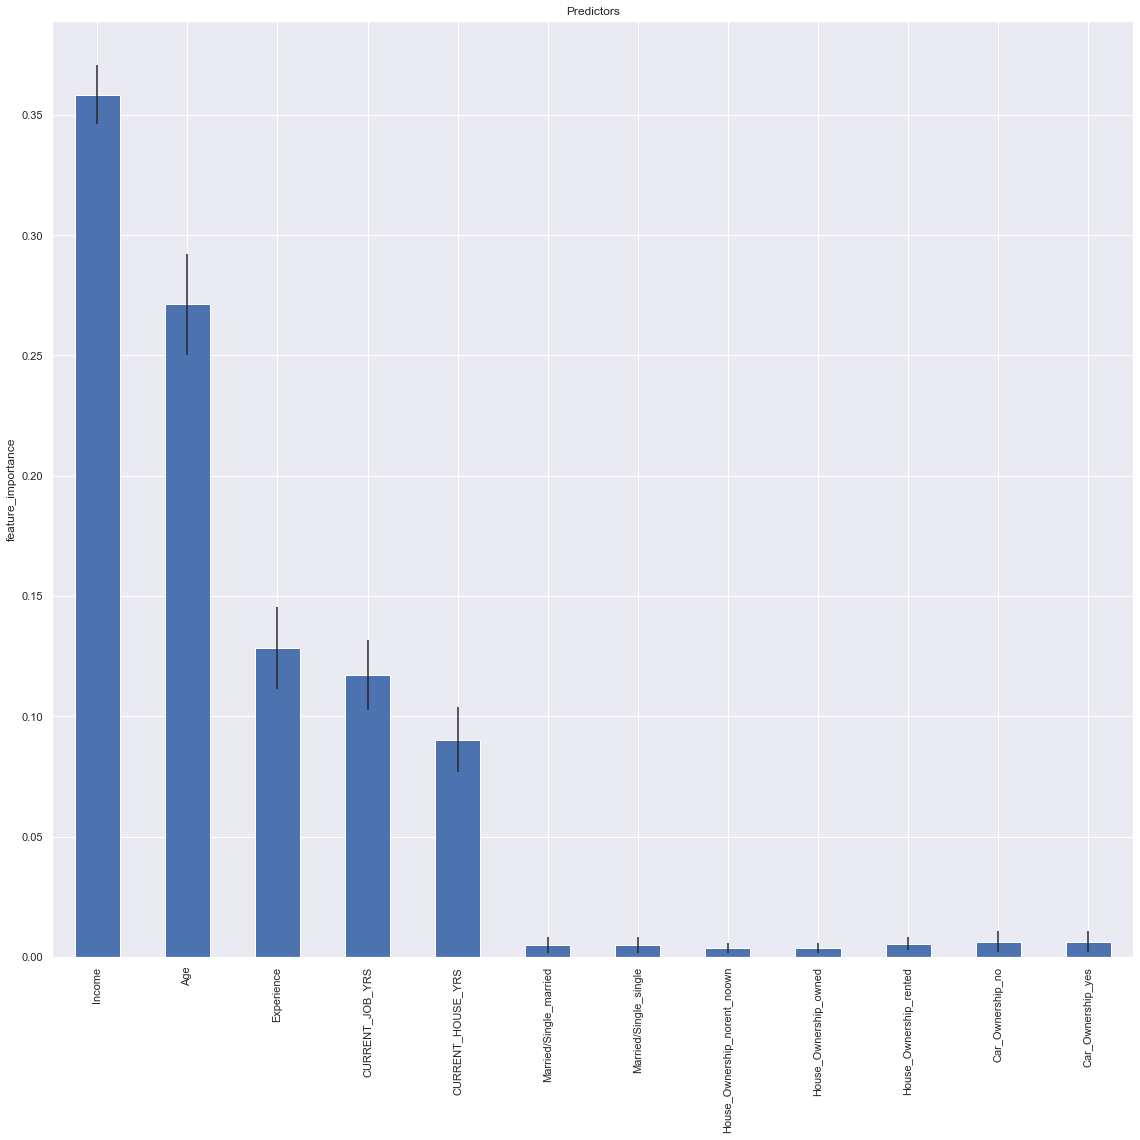

In [67]:
importances = rforest.feature_importances_
std = np.std([tree.feature_importances_ for tree in rforest.estimators_], axis=0)

feature_names = [f"{column_name}" for column_name, column in X.transpose().iterrows()]
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots(figsize = (16,16))
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Predictors")
ax.set_ylabel("feature_importance")
fig.tight_layout()

Comparing the graphs for feature importance for both upsampled and downsampled dataset, we can see that there is little differences in the ranking of the most important variable, `Income` which is closely followed by `Age`. Thus, when banks look at an individuals profile, they can pay special attention to the loan applicants' income and age.

We further explored income and other variables in our Further Insights notebook.